## Import required libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd

## Paths to datasets

In [2]:
MildDemented_dir = r"../MRI Datasets/Alzheimer's Augmented Dataset/AugmentedAlzheimerDataset/MildDemented"
ModerateDemented_dir = r"../MRI Datasets/Alzheimer's Augmented Dataset/AugmentedAlzheimerDataset/ModerateDemented"
NonDemented_dir = r"../MRI Datasets/Alzheimer's Augmented Dataset/AugmentedAlzheimerDataset/NonDemented"
VeryMildDemented_dir = r"../MRI Datasets/Alzheimer's Augmented Dataset/AugmentedAlzheimerDataset/VeryMildDemented"

## Function to analyze the dataset

In [15]:
def analyze_directory(directory_path, category):
    image_files = [
        f for f in os.listdir(directory_path)
        if os.path.isfile(os.path.join(directory_path, f)) and f.lower().endswith(('png', 'jpg', 'jpeg'))
    ]
    image_sizes = []
    image_modes = []
    for file in image_files:
        try:
            with Image.open(os.path.join(directory_path, file)) as img:
                image_sizes.append(img.size)
                image_modes.append((category, img.mode))
        except Exception as e:
            print(f"Error processing {file}: {e}")
    return image_files, image_sizes, image_modes

## Analyze each directory

In [16]:
categories = {
    "Mild Demented": MildDemented_dir,
    "Moderate Demented": ModerateDemented_dir,
    "Non Demented": NonDemented_dir,
    "Very Mild Demented": VeryMildDemented_dir
}

data_summary = {}
image_dimensions = []
image_colors = []

for category, directory in categories.items():
    files, sizes, modes = analyze_directory(directory, category)
    data_summary[category] = len(files)
    image_dimensions.extend([(category, *size) for size in sizes])
    image_colors.extend(modes)

## Create a DataFrame for dimensions

In [17]:
df_dimensions = pd.DataFrame(image_dimensions, columns=["Category", "Width", "Height"])
df_colors = pd.DataFrame(image_colors, columns=["Category", "Mode"])

In [18]:
df_dimensions

,Category,Width,Height
0,Mild Demented,200,190
1,Mild Demented,200,190
2,Mild Demented,180,180
3,Mild Demented,200,190
4,Mild Demented,200,190
...,...,...,...
33979,Very Mild Demented,180,180
33980,Very Mild Demented,200,190
33981,Very Mild Demented,180,180
33982,Very Mild Demented,180,180


In [19]:
df_colors

,Category,Mode
0,Mild Demented,RGB
1,Mild Demented,RGB
2,Mild Demented,RGB
3,Mild Demented,RGB
4,Mild Demented,RGB
...,...,...
33979,Very Mild Demented,RGB
33980,Very Mild Demented,RGB
33981,Very Mild Demented,RGB
33982,Very Mild Demented,RGB


## Display class distribution

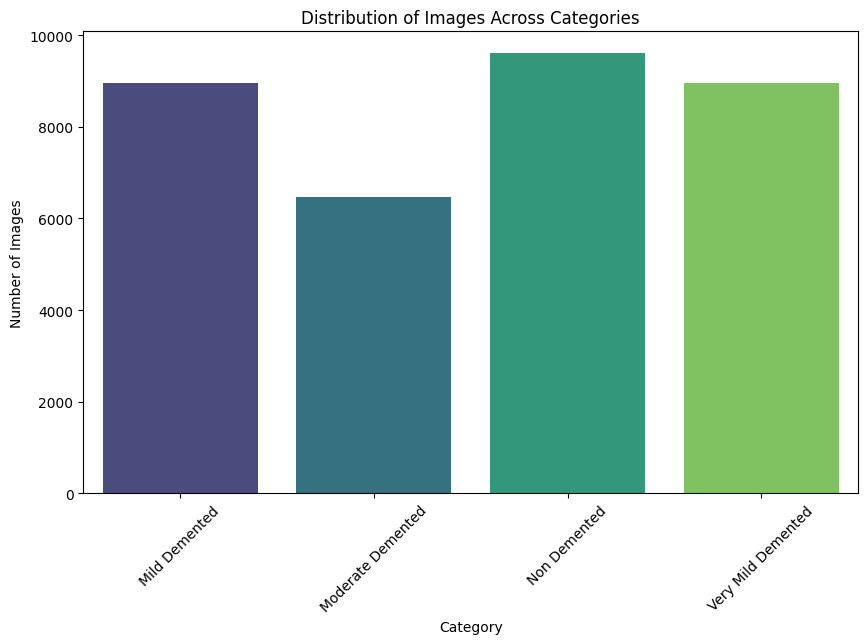

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(data_summary.items(), columns=["Category", "Count"]),
            x="Category", y="Count", palette="viridis", hue="Category", dodge=False, legend=False)
plt.title("Distribution of Images Across Categories")
plt.ylabel("Number of Images")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

## Plot random sample images

In [21]:
def plot_sample_images(category, directory, n_samples=5):
    files = os.listdir(directory)[:n_samples]
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(files):
        try:
            img = Image.open(os.path.join(directory, file))
            plt.subplot(1, n_samples, i + 1)
            plt.imshow(img, cmap="gray" if img.mode != "RGB" else None)
            plt.title(f"{category} ({img.mode})")
            plt.axis("off")
        except Exception as e:
            print(f"Error displaying {file}: {e}")
    plt.show()

## Display sample images

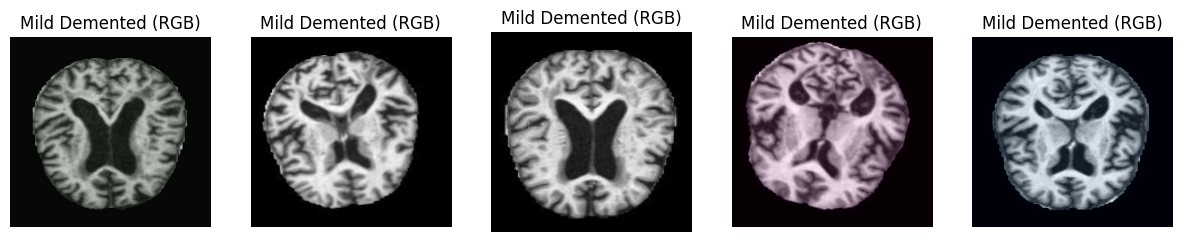

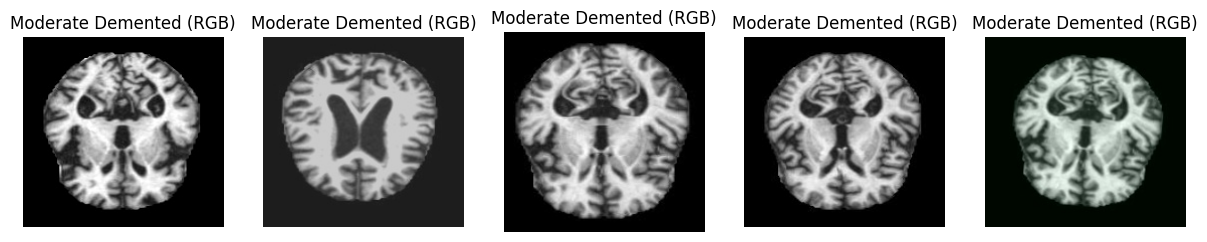

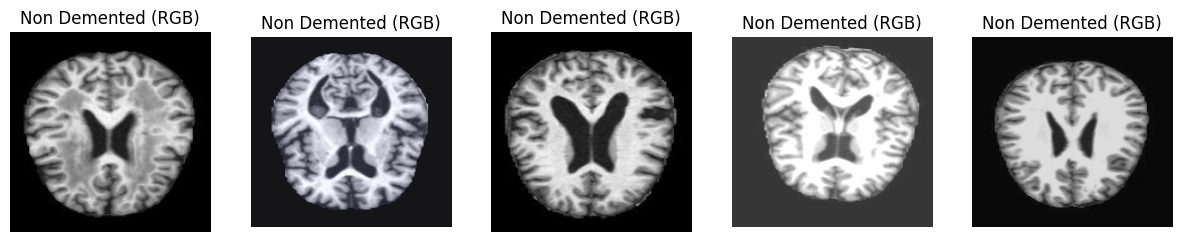

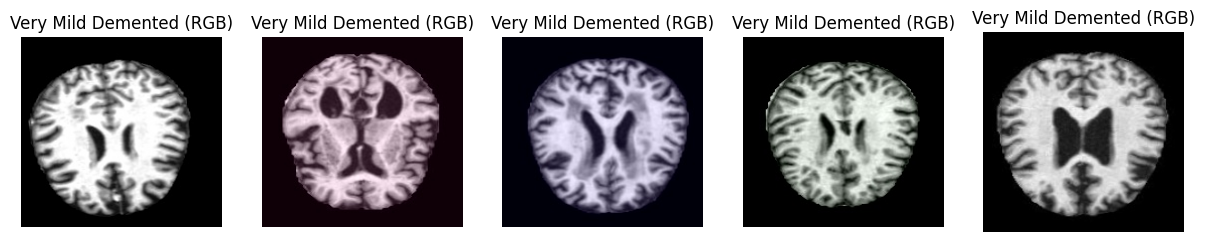

In [22]:
for category, directory in categories.items():
    plot_sample_images(category, directory)

## Analyze image dimensions

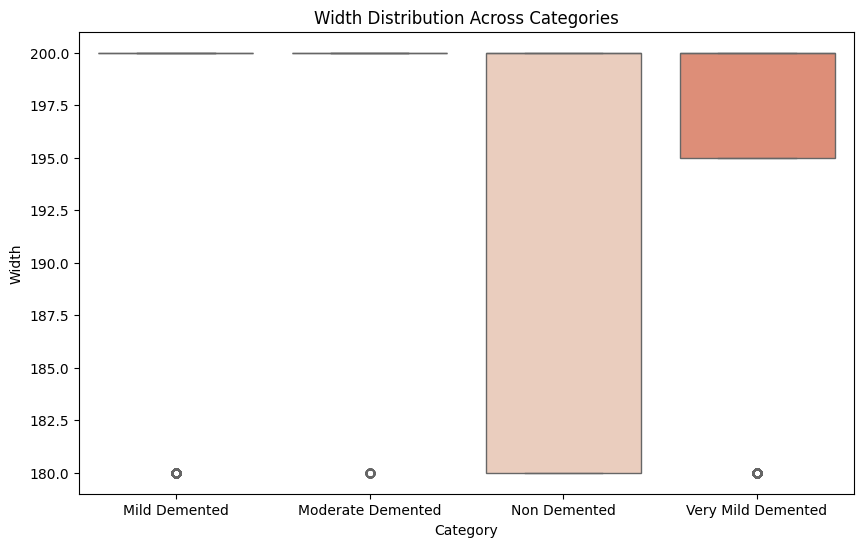

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dimensions, x="Category", y="Width", palette="coolwarm", hue="Category", dodge=False, legend=False)
plt.title("Width Distribution Across Categories")
plt.show()

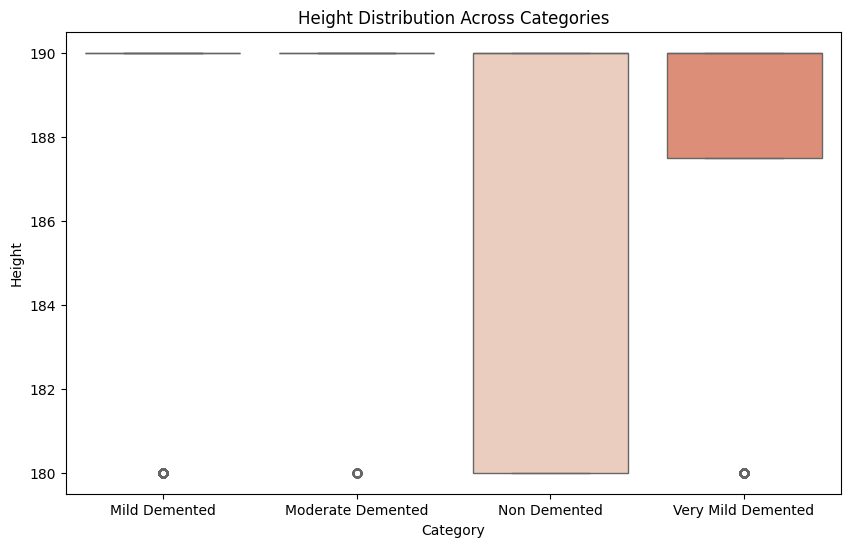

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dimensions, x="Category", y="Height", palette="coolwarm", hue="Category", dodge=False, legend=False)
plt.title("Height Distribution Across Categories")
plt.show()

## Statistical Summary

In [25]:
summary_stats = df_dimensions.groupby("Category").agg(
    Count=("Width", "count"),
    Avg_Width=("Width", "mean"),
    Avg_Height=("Height", "mean"),
    Med_Width=("Width", "median"),
    Med_Height=("Height", "median")
).reset_index()

print("Statistical Summary:")
print(summary_stats)

Statistical Summary:
             Category  Count   Avg_Width  Avg_Height  Med_Width  Med_Height
0       Mild Demented   8960  198.000000  189.000000      200.0       190.0
1   Moderate Demented   6464  199.801980  189.900990      200.0       190.0
2        Non Demented   9600  193.333333  186.666667      200.0       190.0
3  Very Mild Demented   8960  195.000000  187.500000      200.0       190.0


In [29]:
# Save the DataFrame to a CSV file (Optional)
output_csv = "dementia_image_stats.csv"
summary_stats.to_csv(output_csv, index=False)
print(f"Summary statistics saved to {output_csv}")

Summary statistics saved to dementia_image_stats.csv


In [30]:
output_dimensions_csv = "dementia_image_dimensions.csv"
df_dimensions.to_csv(output_dimensions_csv, index=False)
print(f"Summary statistics saved to {output_csv}")

Summary statistics saved to dementia_image_stats.csv


In [31]:
output_colors_csv = "dementia_image_colors.csv"
df_colors.to_csv(output_colors_csv, index=False)
print(f"Summary statistics saved to {output_csv}")

Summary statistics saved to dementia_image_stats.csv
